---
# Element-Wise Data Operations in Pandas


---
## 1. Element-Wise Operations and Ufunctions - Definitions:
An __Element-Wise Opeartion__ is an operation that can easily be distributed over the elements of a data container.
One of the essential advantages of Pandas is its ability to perform quick element-wise operations.  

A __Universal Function (ufunc)__ is a function that takes an array of data and operates in an element-by-element fashion to produce another array of data.
Pandas leverages on __NumPy__'s universal functions, which include __addition, subtraction, multiplication, logs, exponentials__, etc.

- __ufuncs__ are index aligned operations
- __ufuncs__ are quick - use them when possible


For a list of available ufuncs, see: https://docs.scipy.org/doc/numpy/reference/ufuncs.html

In [1]:
import pandas as pd
import numpy as np

---
## 2. The Reshape() Function:
Before we go into exploring element-wise operations and ufunctions, let's take a look at a quick way of generating a DataFrame.
To do this, we will use the `reshape()` function - it takes an array of data and reshapes it, without changing the data in the array:

Example:
<center>
<div>
<img src="reshape_func.png" width="500"/>
</div>
</center>                               
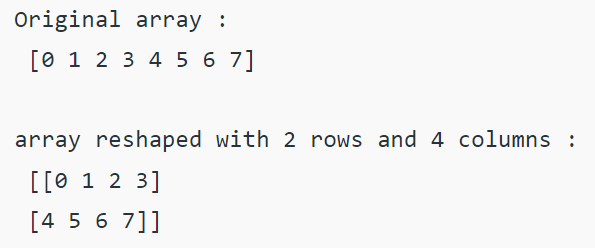

In [2]:
# Generate a df with the .reshape function
def make_df2():
    data = np.array(range(10)).reshape(-1,2)
    return pd.DataFrame(data, columns=["col1", "col2"])

In [3]:
df = make_df2()
df

,col1,col2
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


---
## 3. Element-Wise Operations on Series:
Let's explore how universal functions operate on __Series__! In what follows we will learn how to apply some basic math functions on an element-by-element basis, producing a new Series:

- __addition__ : using the `+` or `series1.add(series2)` ufunction
- __multiplication__ using the `*` or `series.multiply(series2)` ufunction

Run the following code snippets to observe how the functions operate in an index aligned manner!

In [7]:
df

,col1,col2
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [5]:
# Adding a constant to a Series
df["col1"] + 9000

0    9000
1    9002
2    9004
3    9006
4    9008
Name: col1, dtype: int32

In [6]:
# Add two Series together
df["col2"] + df["col1"]

0     1
1     5
2     9
3    13
4    17
dtype: int32

In [8]:
# Alternatively, we can use the .add() ufunc
df["col1"].add(df["col2"])

0     1
1     5
2     9
3    13
4    17
dtype: int32

In [9]:
# Multiply two Series together
df["col1"]*df["col2"]

0     0
1     6
2    20
3    42
4    72
dtype: int32

In [10]:
# Alternatively, use .multiply() ufunc
df["col1"].multiply(df["col2"])

0     0
1     6
2    20
3    42
4    72
dtype: int32

---
## 4. Element-Wise Operations on DataFrames:

Similarly to Series, we can apply Element-Wise Operations on __DataFrames__. 

Note that ufuncs on DataFrames again operate in an index aligned manner - operations between dataframes with different dimensions will result in a dataframe with the dimensions of the bigger one!

In [11]:
df = make_df2()
df

,col1,col2
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [12]:
# DataFrame + scalar -- adds the scalar to all elements in the df
df + 9000

,col1,col2
0,9000,9001
1,9002,9003
2,9004,9005
3,9006,9007
4,9008,9009


In [13]:
# DataFrame + List -- operation is called broadcasting
# Adds 1 to all elements in 'col1', and 2 to elements in 'col2'
df + [1,2]

,col1,col2
0,1,3
1,3,5
2,5,7
3,7,9
4,9,11


In [14]:
# DataFrame + DataFrame -- adds every element of 1st df to corresponding element in 2nd df
df + df

,col1,col2
0,0,2
1,4,6
2,8,10
3,12,14
4,16,18


---
## 5. The .apply() Method:¶

The `.apply()` method is used to apply an element-wise function to a Series or along one of the axes of a DataFrame. 

Syntax:
- __.apply() method on Series__: `series_name.apply(function)`
- __.apply() method on DataFrames__: `df_name.apply(function, axis = ...)` where `axis = 0 (default)` or `axis = 1`

Since __DataFrames__ are 2-dimensional, we need to instruct the __.apply()__ method on which axis to perform the operation:
- __axis = 1__ - the operation is performed on column level --> the result has the same shape as a column
- __axis = 0 (default)__ - the operation is performed on row level --> the result has the same shape as a row

---
### 5.1. .apply() on Series:

In [15]:
s = df["col1"]
s

0    0
1    2
2    4
3    6
4    8
Name: col1, dtype: int32

In [19]:
# Using .apply to cube every element in our series -- recall lambda functions
# Only use .apply to perform element-wise operations, when there is no supported ufunc
s.apply(lambda x: x**3)

0      0
1      8
2     64
3    216
4    512
Name: col1, dtype: int64

---
### 5.2. .apply() on DataFrames:

In [20]:
# Applying a function to every element in our dataframe
df.apply(lambda x: x**3)

,col1,col2
0,0,1
1,8,27
2,64,125
3,216,343
4,512,729


In [24]:
# axis = 1 - > return something the shape of a column, i.e. apply the function row-wise
# ufunc equivalent: df["col1"] + 2*df["col2"]
display(df)
df.apply(lambda row: row["col1"] + 2*row["col2"], axis=1)

,col1,col2
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


0     2
1     8
2    14
3    20
4    26
dtype: int32

In [23]:
# axis = 0 -> return something the shape of a row, i.e. apply the function column-wise
display(df)
df.apply(lambda col: sum(col), axis=0)

,col1,col2
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


col1    20
col2    25
dtype: int64

---
## 6. Summary:
- An __Element-Wise Operation__ is an operation that can easily be distributed over the elements of a data container
- Pandas leverages on __NumPy's universal functions__, which include addition, subtraction, multiplication, logs, exponentials, etc
- The __.apply()__ method is used to apply an element-wise function to a Series or along one of the axes of a DataFrame - a great tool to use when there is no ufunc existing for the operation we want to conduct!

---
## 7. Concept Check:
1. If you use df.apply(..., axis=0), what is the shape of the output? Suppose df.shape = (10,5)
2. If you use df.apply(..., axis=1), what is the shape of the output? Suppose df.shape = (10,5)
3. Use .apply on a series. The input to the function is x. If x is even, return 0. Else, return x.
    - Eg. pd.Series([1,2,3,4,5]) -> [1,0,3,0,5]
4. Suppose you had a dataframe df = pd.DataFrame({'currency':['USD','AUD','USD'], 'amount':[100,200,300]}). Use the apply method to get a column with the amounts in GBP.
   - To go from AUD to GBP, divide by 1.94.
   - To go from USD to GBP, divide by 1.32.
5. Compare the time it takes to use apply vs a ufunc. Hint: Google and use the `%timeit`.

In [57]:
# 1. (1,5) 1 row, 5 cols
# 2. (10,1)
# 3.
s = pd.Series([1,2,3,4,5])
s2 = s.apply(lambda x: 0 if x%2==0 else x)
display(s2)
# 4.
df = pd.DataFrame({'currency':['USD','AUD','USD'], 'amount':[100,200,300]})

def convert(row):
    if row["currency"] == "USD":
        return row["amount"] / 1.32
    else:
        return row["amount"] / 1.94

# df2 = df.apply(convert, axis=1)
# axis = 1, iterate over the row
df.loc[[0]]#["amount"]

df2 = df.apply(lambda row: row["amount"]/1.32 if row["currency"]=="USD" else row["amount"]/1.94, axis=1)
display(df2)

# 5.
%timeit s * 1000
%timeit s.apply(lambda x:x*1000)


0    1
1    0
2    3
3    0
4    5
dtype: int64

0     75.757576
1    103.092784
2    227.272727
dtype: float64

In [50]:
mask = (df["currency"] == "USD")
df[mask]

,currency,amount
0,USD,100
2,USD,300
